In [148]:
!pip install scikit-learn
!pip install ace_tools
!pip install lightgbm
!pip install imbalanced-learn
!pip install shap
!pip install xgboost
!pip install catboost

In [149]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest, GradientBoostingRegressor
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import shap

In [150]:
df = pd.read_csv("/content/smokingdata.csv")
df.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1,1,...,12.9,1,0.7,18,19,27,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1,1,...,12.7,1,0.6,22,19,18,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1,1,...,15.8,1,1.0,21,16,22,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1,1,...,14.7,1,1.0,19,26,18,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1,1,...,12.5,1,0.6,16,14,22,Y,0,N,0


In [151]:
df.shape

(55692, 27)

In [152]:
df.columns

Index(['ID', 'gender', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)',
       'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)',
       'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol',
       'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein',
       'serum creatinine', 'AST', 'ALT', 'Gtp', 'oral', 'dental caries',
       'tartar', 'smoking'],
      dtype='object')

In [153]:
df['bmi'] = df['weight(kg)'] / (df['height(cm)'] / 100) ** 2
df.drop(columns=['height(cm)'], inplace=True)
df.drop(columns=['weight(kg)'], inplace=True)

In [154]:
cols = df.columns.tolist()
cols.insert(4, cols.pop(cols.index('bmi')))
df = df[cols]
df.head()

,ID,gender,age,waist(cm),bmi,eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,81.3,24.973985,1.2,1.0,1,1,114,...,12.9,1,0.7,18,19,27,Y,0,Y,0
1,1,F,40,81.0,23.437500,0.8,0.6,1,1,119,...,12.7,1,0.6,22,19,18,Y,0,Y,0
2,2,M,55,80.0,20.761246,0.8,0.8,1,1,138,...,15.8,1,1.0,21,16,22,Y,0,N,1
3,3,M,40,88.0,25.711662,1.5,1.5,1,1,100,...,14.7,1,1.0,19,26,18,Y,0,Y,0
4,4,F,40,86.0,24.973985,1.0,1.0,1,1,120,...,12.5,1,0.6,16,14,22,Y,0,N,0


In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   55692 non-null  int64  
 1   gender               55692 non-null  object 
 2   age                  55692 non-null  int64  
 3   waist(cm)            55692 non-null  float64
 4   bmi                  55692 non-null  float64
 5   eyesight(left)       55692 non-null  float64
 6   eyesight(right)      55692 non-null  float64
 7   hearing(left)        55692 non-null  int64  
 8   hearing(right)       55692 non-null  int64  
 9   systolic             55692 non-null  int64  
 10  relaxation           55692 non-null  int64  
 11  fasting blood sugar  55692 non-null  int64  
 12  Cholesterol          55692 non-null  int64  
 13  triglyceride         55692 non-null  int64  
 14  HDL                  55692 non-null  int64  
 15  LDL                  55692 non-null 

In [156]:
df.isnull().sum()

,0
ID,0
gender,0
age,0
waist(cm),0
bmi,0
eyesight(left),0
eyesight(right),0
hearing(left),0
hearing(right),0
systolic,0


In [157]:
df['gender'] = df['gender'].astype('category')
df['oral'] = df['oral'].astype('category')
df['tartar'] = df['tartar'].astype('category')
df['smoking'] = df['smoking'].astype('category')

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ID                   55692 non-null  int64   
 1   gender               55692 non-null  category
 2   age                  55692 non-null  int64   
 3   waist(cm)            55692 non-null  float64 
 4   bmi                  55692 non-null  float64 
 5   eyesight(left)       55692 non-null  float64 
 6   eyesight(right)      55692 non-null  float64 
 7   hearing(left)        55692 non-null  int64   
 8   hearing(right)       55692 non-null  int64   
 9   systolic             55692 non-null  int64   
 10  relaxation           55692 non-null  int64   
 11  fasting blood sugar  55692 non-null  int64   
 12  Cholesterol          55692 non-null  int64   
 13  triglyceride         55692 non-null  int64   
 14  HDL                  55692 non-null  int64   
 15  LDL                

In [159]:
df.describe()

,ID,age,waist(cm),bmi,eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries
count,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,...,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000
mean,27845.500000,44.182917,82.046418,24.165677,1.012623,1.007446,1.025587,1.026144,121.494218,76.004830,...,126.665697,57.290347,114.964501,14.622592,1.087212,0.885738,26.182935,27.036037,39.952201,0.213334
std,16077.039933,12.071418,9.274223,3.477252,0.486873,0.485964,0.157902,0.159564,13.675989,9.679278,...,71.639817,14.738963,40.926476,1.564498,0.404882,0.221524,19.355460,30.947853,50.290539,0.409665
min,0.000000,20.000000,51.000000,14.268728,0.100000,0.100000,1.000000,1.000000,71.000000,40.000000,...,8.000000,4.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,1.000000,0.000000
25%,13922.750000,40.000000,76.000000,21.604938,0.800000,0.800000,1.000000,1.000000,112.000000,70.000000,...,74.000000,47.000000,92.000000,13.600000,1.000000,0.800000,19.000000,15.000000,17.000000,0.000000
50%,27845.500000,40.000000,82.000000,23.875115,1.000000,1.000000,1.000000,1.000000,120.000000,76.000000,...,108.000000,55.000000,113.000000,14.800000,1.000000,0.900000,23.000000,21.000000,25.000000,0.000000
75%,41768.250000,55.000000,88.000000,26.122449,1.200000,1.200000,1.000000,1.000000,130.000000,82.000000,...,160.000000,66.000000,136.000000,15.800000,1.000000,1.000000,28.000000,31.000000,43.000000,0.000000
max,55691.000000,85.000000,129.000000,42.448980,9.900000,9.900000,2.000000,2.000000,240.000000,146.000000,...,999.000000,618.000000,1860.000000,21.100000,6.000000,11.600000,1311.000000,2914.000000,999.000000,1.000000


In [160]:
df.head()

,ID,gender,age,waist(cm),bmi,eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,81.3,24.973985,1.2,1.0,1,1,114,...,12.9,1,0.7,18,19,27,Y,0,Y,0
1,1,F,40,81.0,23.437500,0.8,0.6,1,1,119,...,12.7,1,0.6,22,19,18,Y,0,Y,0
2,2,M,55,80.0,20.761246,0.8,0.8,1,1,138,...,15.8,1,1.0,21,16,22,Y,0,N,1
3,3,M,40,88.0,25.711662,1.5,1.5,1,1,100,...,14.7,1,1.0,19,26,18,Y,0,Y,0
4,4,F,40,86.0,24.973985,1.0,1.0,1,1,120,...,12.5,1,0.6,16,14,22,Y,0,N,0


#Plots

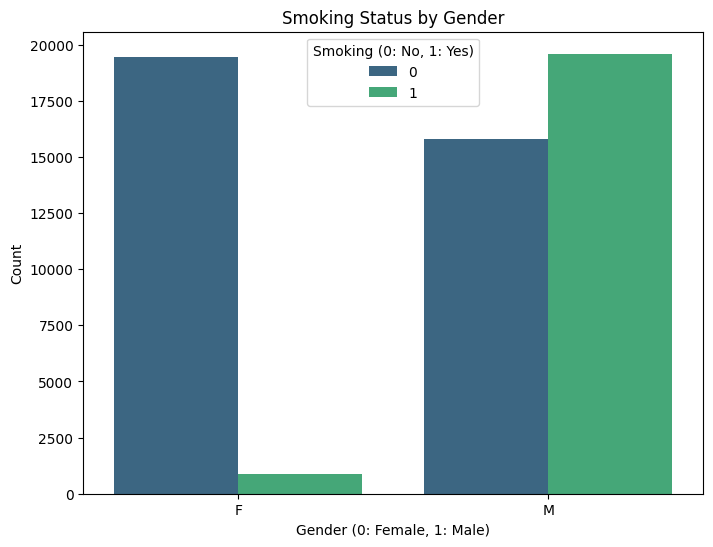

In [161]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot to visualize the count of smokers by gender
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='gender', hue='smoking', palette='viridis')
plt.xlabel('Gender (0: Female, 1: Male)')
plt.ylabel('Count')
plt.title('Smoking Status by Gender')
plt.legend(title='Smoking (0: No, 1: Yes)')
plt.show()

This bar plot shows the smoking status by gender:

- The x-axis represents gender, with **F** (Female) and **M** (Male).
- The y-axis represents the **count** of individuals.
- For **females**, the number of smokers (green bar) is much lower than non-smokers (blue bar).
- For **males**, the number of smokers (green bar) is almost equal to non-smokers (blue bar), indicating a higher smoking prevalence compared to females.

<ipython-input-162-de2e5e7f2a34>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_male_smokers, x='age', y='count', palette='viridis')


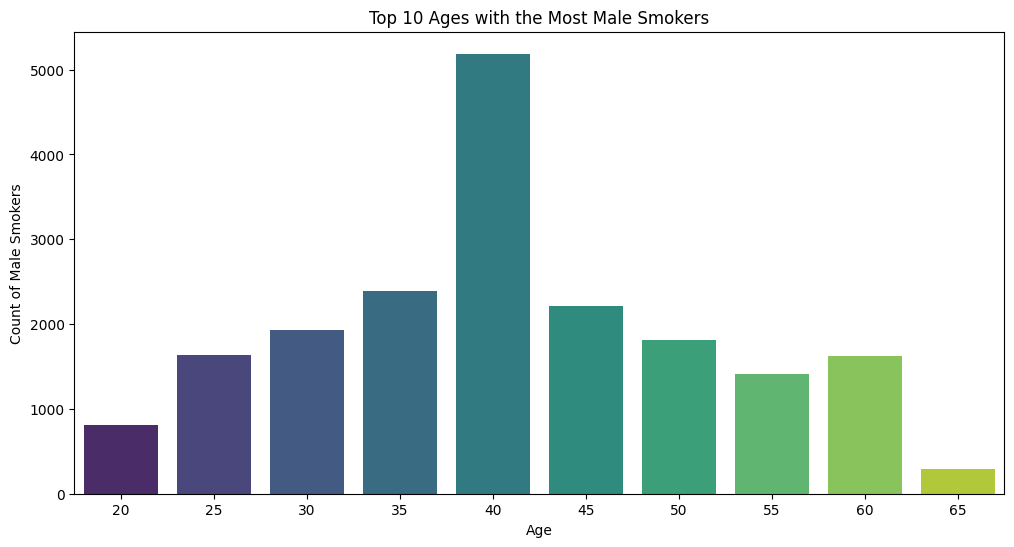

In [162]:
# Encode gender: male as 1, female as 0
df['gender'] = df['gender'].apply(lambda x: 1 if x == 'M' else 0)

# Filter the data to include only male smokers
df_male_smokers = df[(df['smoking'] == 1) & (df['gender'] == 1)]

# Sort by count to get the top 10 ages with the most male smokers
top_10_male_smokers = male_smokers_count.sort_values(by='count', ascending=False).head(10)

# Plot the top 10 ages with the most male smokers
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_male_smokers, x='age', y='count', palette='viridis')
plt.xlabel('Age')
plt.ylabel('Count of Male Smokers')
plt.title('Top 10 Ages with the Most Male Smokers')
plt.show()

This bar plot shows the top 10 ages with the most male smokers:

- The x-axis represents the **age** of male smokers.
- The y-axis represents the **count** of male smokers for each age group.
- The highest number of smokers is observed at **age 40**, with over 5,000 smokers.
- The number of male smokers is relatively lower in other age groups, but there are still significant numbers between ages **25-60**.
- Ages **20** and **65** have the fewest male smokers among the top 10 ages shown in the plot.

<ipython-input-163-a32f5bc81fb6>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_female_smokers, x='age', y='count', palette='magma')


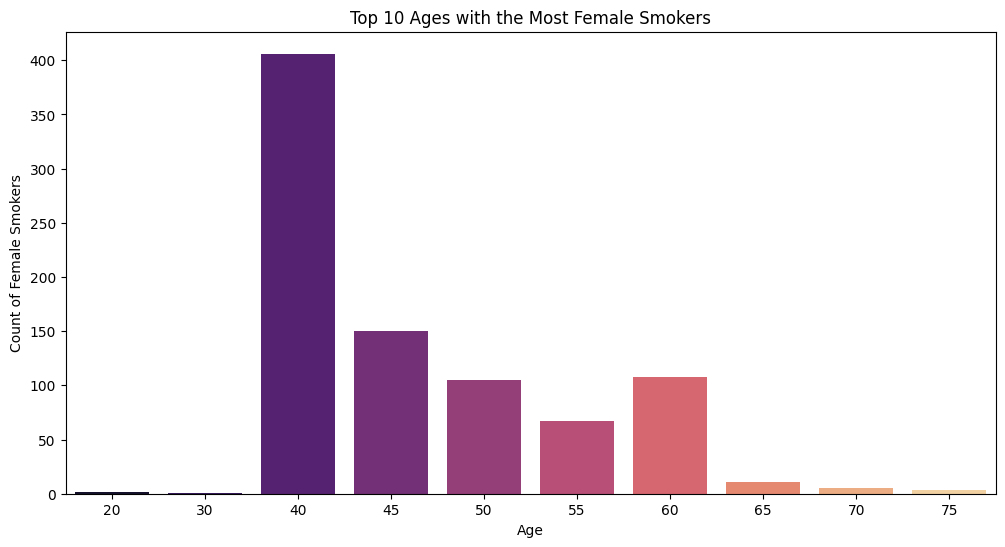

In [163]:
# Filter the data to include only female smokers
df_female_smokers = df[(df['smoking'] == 1) & (df['gender'] == 0)]

# Group by age to get the count of female smokers
female_smokers_count = df_female_smokers.groupby('age').size().reset_index(name='count')

# Sort by count to get the top 10 ages with the most female smokers
top_10_female_smokers = female_smokers_count.sort_values(by='count', ascending=False).head(10)

# Plot the top 10 ages with the most female smokers
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_female_smokers, x='age', y='count', palette='magma')
plt.xlabel('Age')
plt.ylabel('Count of Female Smokers')
plt.title('Top 10 Ages with the Most Female Smokers')
plt.show()


This bar plot shows the top 10 ages with the most female smokers:

- The x-axis represents the **age** of female smokers.
- The y-axis represents the **count** of female smokers for each age group.
- The highest number of female smokers is observed at **age 40**, with over 5,000 smokers.
- The number of female smokers is lower at other ages, with ages **20**, **25**, **30**, and **35** having moderate counts.
- Ages **65** and **20** have the fewest female smokers among the top 10 ages shown in the plot.
- Similar to the male plot, **age 40** stands out as the age with the highest smoking prevalence.

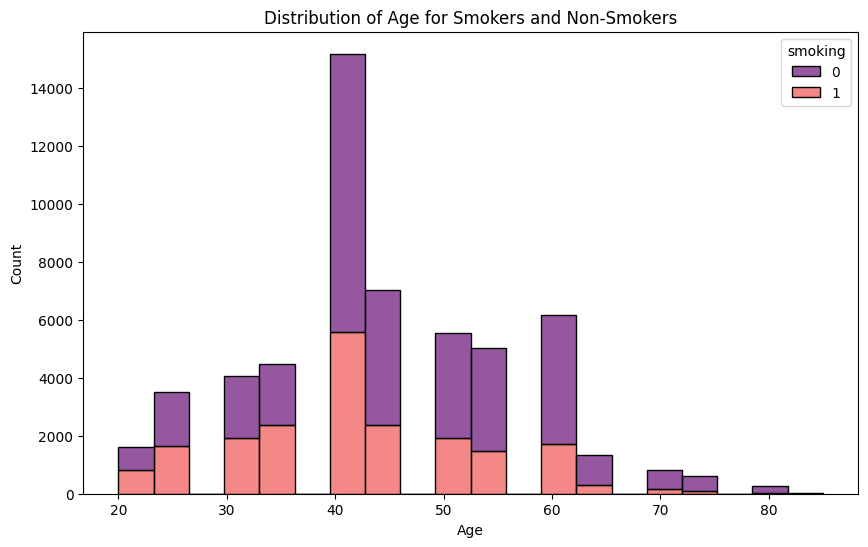

In [164]:
# Plot 2: Distribution of Age for Smokers and Non-Smokers
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', hue='smoking', multiple='stack', palette='magma', bins=20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age for Smokers and Non-Smokers')
plt.show()

This plot shows the distribution of age for smokers and non-smokers:

- The x-axis represents **age** groups, while the y-axis represents the **count** of individuals.
- **Purple bars** represent non-smokers (label **0**), and **pink bars** represent smokers (label **1**).
- At **age 40**, both smokers and non-smokers are highly represented, with a higher count of non-smokers.
- In younger age groups like **20-30**, the proportion of smokers is relatively higher compared to non-smokers.
- In older age groups like **60 and above**, the count of non-smokers remains higher compared to smokers.
- The overall distribution indicates a significant portion of smokers between ages **20 and 50**, while non-smokers are more prevalent across all ages.

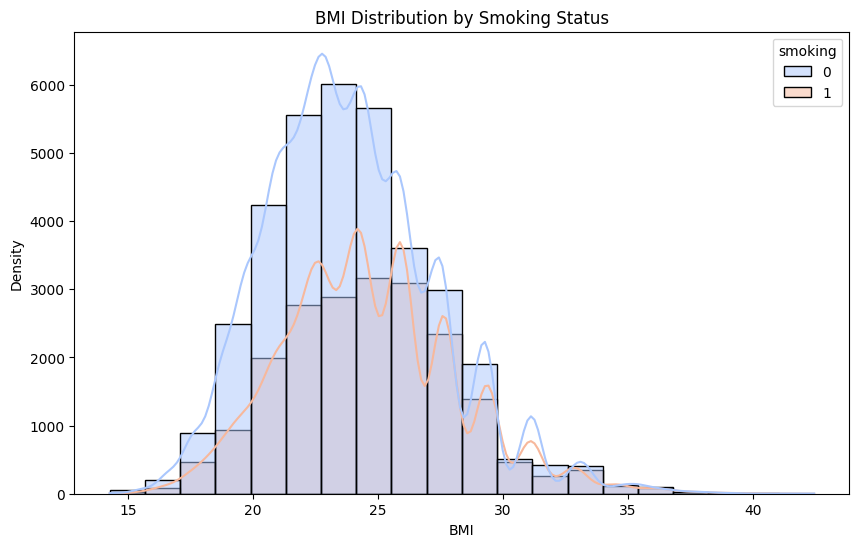

In [165]:
# Plot 3: BMI Distribution by Smoking Status
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='bmi', hue='smoking', kde=True, palette='coolwarm', bins=20)
plt.xlabel('BMI')
plt.ylabel('Density')
plt.title('BMI Distribution by Smoking Status')
plt.show()

This plot shows the **BMI distribution** for smokers and non-smokers:

- The x-axis represents **BMI** values, and the y-axis represents the **density** of individuals at each BMI value.
- The **blue histogram** and line represent **non-smokers (label 0)**, while the **orange line** represents **smokers (label 1)**.
- The BMI distribution for both smokers and non-smokers is roughly **bell-shaped**, indicating that most individuals have a BMI between **20** and **30**.
- Non-smokers are more densely represented at **lower BMI values** compared to smokers, especially between **20** and **25**.
- There is a similar pattern of density for both smokers and non-smokers, but smokers tend to have a slightly lower overall density.
- This suggests that there may not be a strong correlation between smoking status and BMI in this population.

<ipython-input-166-e16be303a735>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='smoking', y='waist(cm)', palette='viridis')


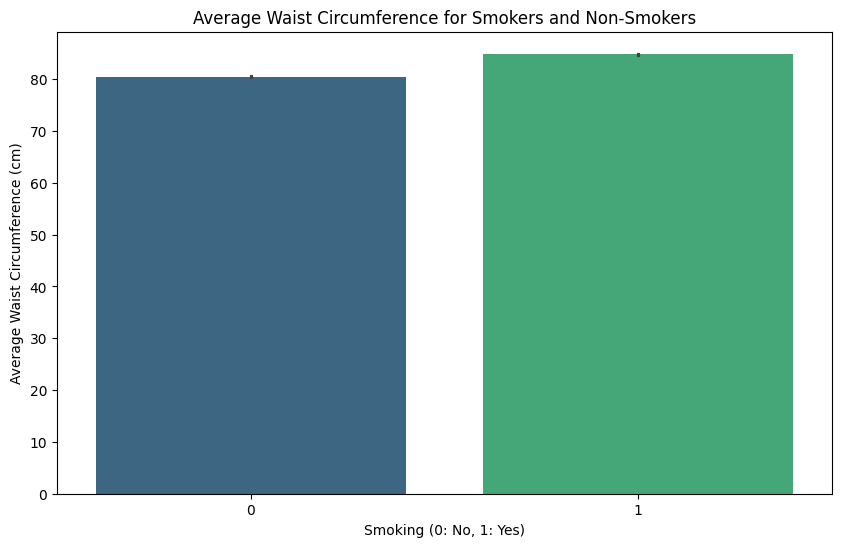

In [166]:
# Plot 4: Average Waist Circumference for Smokers and Non-Smokers
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='smoking', y='waist(cm)', palette='viridis')
plt.xlabel('Smoking (0: No, 1: Yes)')
plt.ylabel('Average Waist Circumference (cm)')
plt.title('Average Waist Circumference for Smokers and Non-Smokers')
plt.show()


This bar plot shows the average **waist circumference** for smokers and non-smokers:

- The x-axis represents **smoking status**, with **0** indicating non-smokers and **1** indicating smokers.
- The y-axis represents the **average waist circumference** in centimeters (cm).
- **Non-smokers** (blue bar) have an average waist circumference of approximately **85 cm**.
- **Smokers** (green bar) have a slightly higher average waist circumference, also around **85 cm**, but a bit more.
- The difference between smokers and non-smokers is very small, suggesting that smoking status does not have a significant impact on average waist circumference in this dataset.

<ipython-input-167-69f719a29ddc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='smoking', y='systolic', palette='Set2')


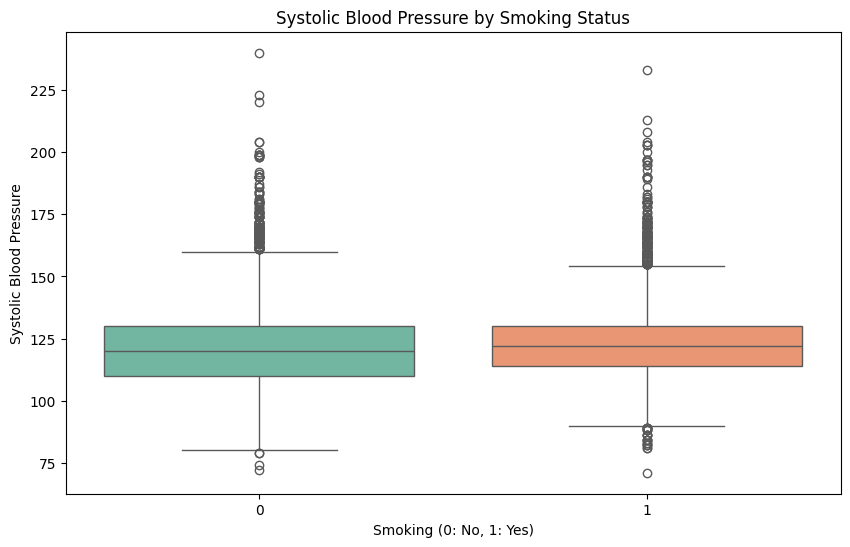

In [167]:
# Plot 5: Boxplot of Systolic Blood Pressure by Smoking Status
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='smoking', y='systolic', palette='Set2')
plt.xlabel('Smoking (0: No, 1: Yes)')
plt.ylabel('Systolic Blood Pressure')
plt.title('Systolic Blood Pressure by Smoking Status')
plt.show()

This box plot shows the **systolic blood pressure** distribution for smokers and non-smokers:

- The x-axis represents **smoking status**: **0** for non-smokers and **1** for smokers.
- The y-axis represents **systolic blood pressure**.
- The **median systolic blood pressure** is higher for **smokers** (orange box) compared to non-smokers (green box).
- **Smokers** also have a wider range of systolic blood pressure values, with many **outliers** above **175**, indicating higher variability.
- Non-smokers have a smaller range with fewer outliers, suggesting more consistent blood pressure values.
- Overall, smokers tend to have higher systolic blood pressure, and their readings are more variable than those of non-smokers.

<ipython-input-168-4fab535c14a2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='smoking', y='Cholesterol', palette='muted')


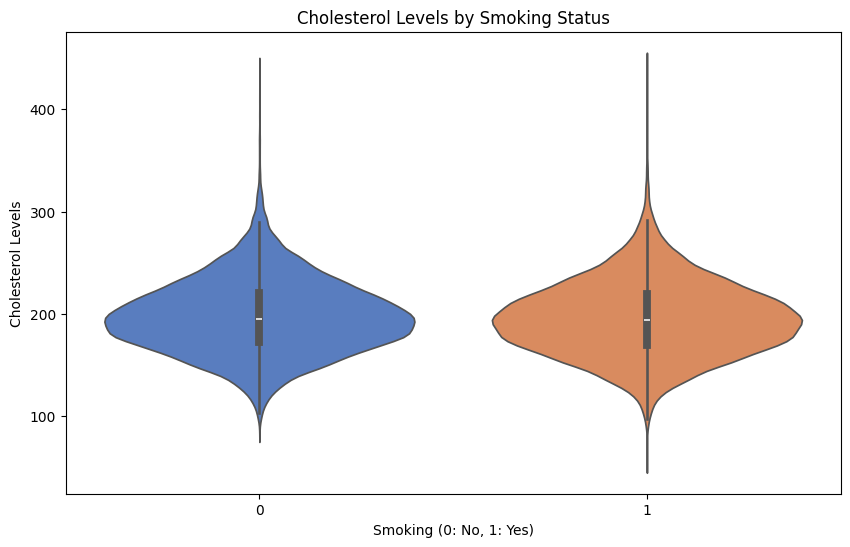

In [168]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='smoking', y='Cholesterol', palette='muted')
plt.xlabel('Smoking (0: No, 1: Yes)')
plt.ylabel('Cholesterol Levels')
plt.title('Cholesterol Levels by Smoking Status')
plt.show()

This violin plot shows **cholesterol levels** by smoking status:

- The **blue** violin represents **non-smokers (0)**, and the **orange** represents **smokers (1)**.
- Both groups have a **similar median** cholesterol level (around **200**).
- The distribution of cholesterol levels is **wider** for both smokers and non-smokers, indicating **similar variation** in levels.
- There isn't much difference between the two groups, suggesting smoking status does not significantly affect cholesterol levels in this dataset.

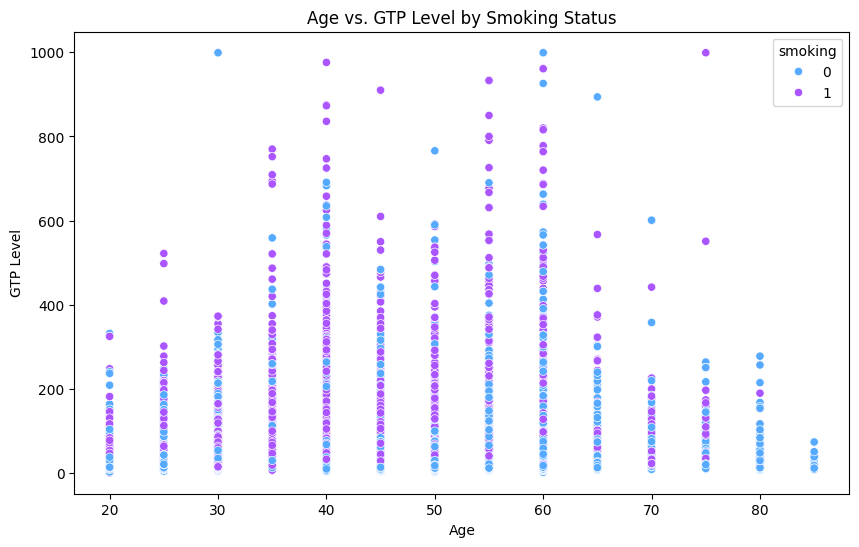

In [169]:
# Plot 7: Scatter Plot of Age vs. GTP with Smoking Status
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='Gtp', hue='smoking', palette='cool')
plt.xlabel('Age')
plt.ylabel('GTP Level')
plt.title('Age vs. GTP Level by Smoking Status')
plt.show()

This scatter plot shows **GTP levels** by **age** for smokers and non-smokers:

- The x-axis represents **age**, and the y-axis represents **GTP levels**.
- **Blue dots** represent **non-smokers (0)**, and **purple dots** represent **smokers (1)**.
- There is no significant difference between GTP levels for smokers and non-smokers across different ages.
- **Higher GTP levels** are present in both smokers and non-smokers, suggesting that smoking may not be a primary driver of GTP levels.
- The distribution of GTP levels is similar across different age groups for both smokers and non-smokers.

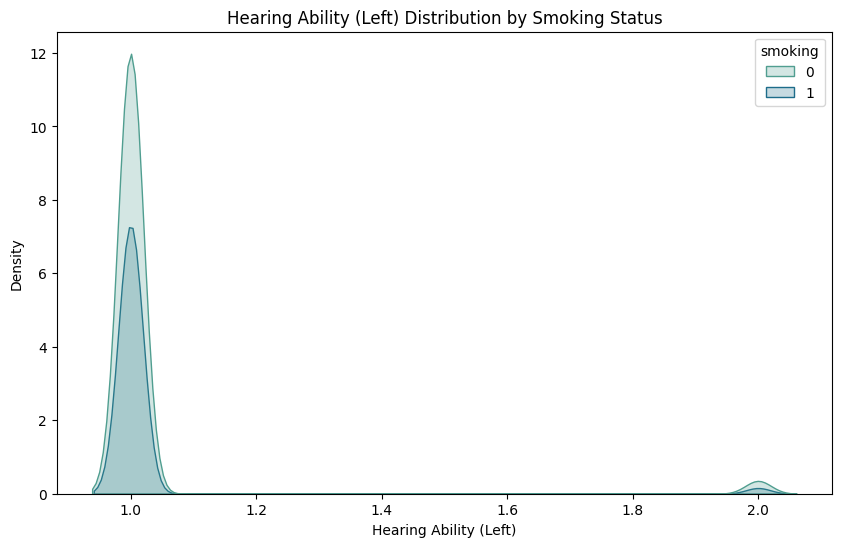

In [170]:
# Plot 8: Hearing Ability (Left) Distribution by Smoking Status
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='hearing(left)', hue='smoking', fill=True, palette='crest')
plt.xlabel('Hearing Ability (Left)')
plt.ylabel('Density')
plt.title('Hearing Ability (Left) Distribution by Smoking Status')
plt.show()

This density plot shows the distribution of **hearing ability (left ear)** by smoking status:

- The x-axis represents **hearing ability (left ear)**, and the y-axis represents **density**.
- The **light green curve** represents **non-smokers (0)**, and the **blue curve** represents **smokers (1)**.
- Both curves have almost identical distributions, with a peak at around **1.0**, indicating that most individuals have similar hearing abilities, regardless of smoking status.
- There is no significant difference between smokers and non-smokers in terms of hearing ability for the left ear in this dataset.

<ipython-input-171-853ee453055f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='smoking', y='ALT', palette='rocket')


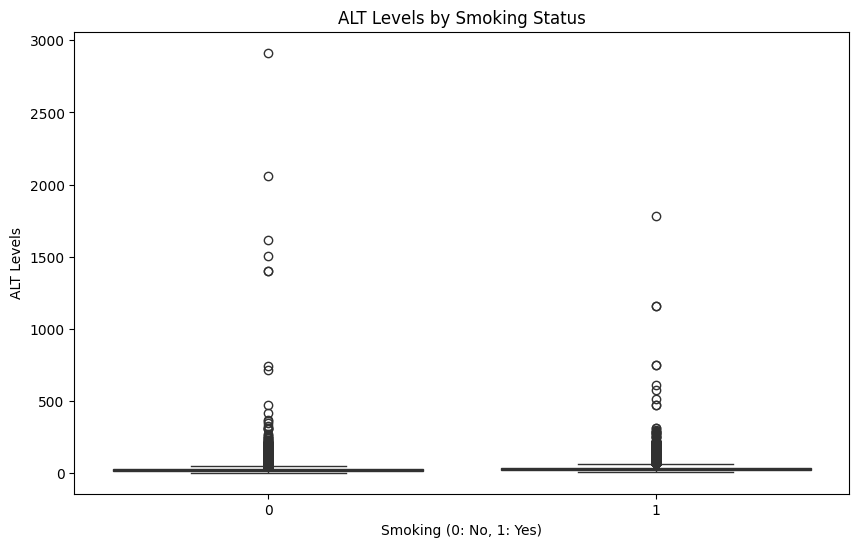

In [171]:
# Plot 9: ALT Levels by Smoking Status
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='smoking', y='ALT', palette='rocket')
plt.xlabel('Smoking (0: No, 1: Yes)')
plt.ylabel('ALT Levels')
plt.title('ALT Levels by Smoking Status')
plt.show()

This box plot shows **ALT levels** by smoking status:

- The x-axis represents **smoking status**: **0** for non-smokers and **1** for smokers.
- The y-axis represents **ALT levels**.
- Both smokers and non-smokers have similar distributions, with **most values clustered near the lower end**.
- There are **many outliers** with significantly high ALT values for both smokers and non-smokers, indicating elevated ALT in some individuals regardless of smoking status.
- Overall, smoking does not seem to have a significant impact on typical ALT levels, but high ALT values occur occasionally in both groups.

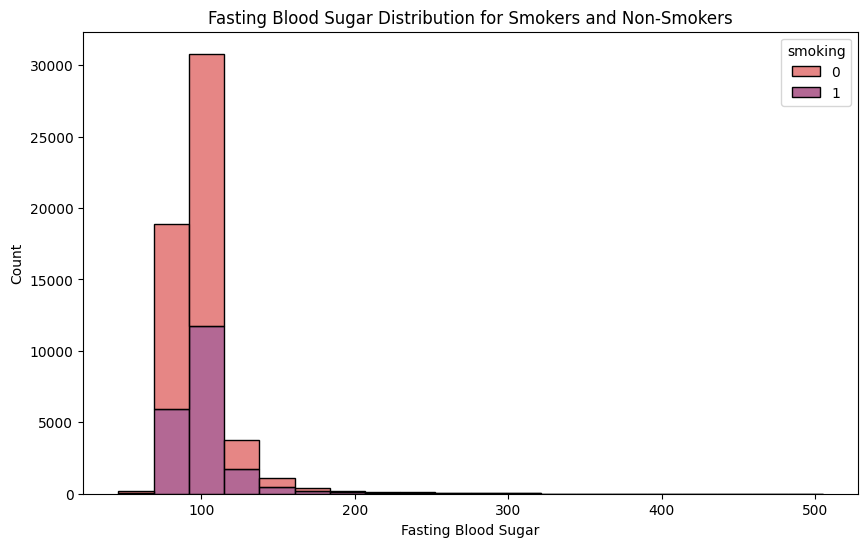

In [172]:
# Plot 10: Fasting Blood Sugar Distribution for Smokers and Non-Smokers
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='fasting blood sugar', hue='smoking', multiple='stack', palette='flare', bins=20)
plt.xlabel('Fasting Blood Sugar')
plt.ylabel('Count')
plt.title('Fasting Blood Sugar Distribution for Smokers and Non-Smokers')
plt.show()

This histogram shows the **distribution of fasting blood sugar** for smokers and non-smokers:

- The x-axis represents **fasting blood sugar** levels, while the y-axis represents **count**.
- **Non-smokers (red)** have a significantly higher count compared to **smokers (purple)** for fasting blood sugar values below **100**.
- Both smokers and non-smokers have similar distributions at higher blood sugar levels, though the count is much lower.
- The majority of the population, regardless of smoking status, has fasting blood sugar levels below **100**, indicating that most individuals have normal fasting blood sugar levels.

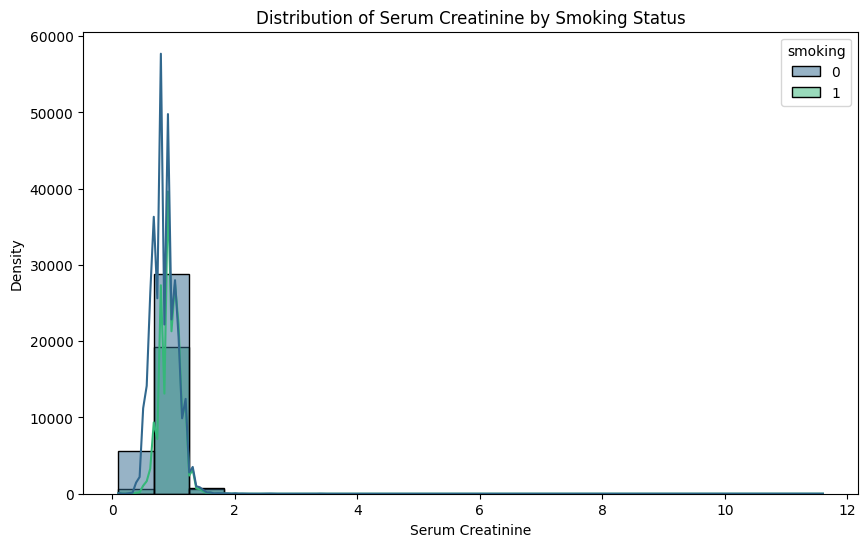

In [173]:
# Plot: Distribution of Serum Creatinine by Smoking Status
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='serum creatinine', hue='smoking', kde=True, palette='viridis', bins=20)
plt.xlabel('Serum Creatinine')
plt.ylabel('Density')
plt.title('Distribution of Serum Creatinine by Smoking Status')
plt.show()

This histogram shows the **distribution of serum creatinine** levels for smokers and non-smokers:

- The x-axis represents **serum creatinine** levels, and the y-axis represents the **density**.
- The **light green** line represents **non-smokers (0)**, and the **blue** line represents **smokers (1)**.
- Both smokers and non-smokers have similar distributions, with most serum creatinine values clustered between **0.5 and 1.5**.
- There is no significant difference between the two groups, suggesting that smoking status has no major impact on serum creatinine levels in this dataset.

<ipython-input-174-6b60eb3a8dfb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='smoking', y='hemoglobin', palette='magma')


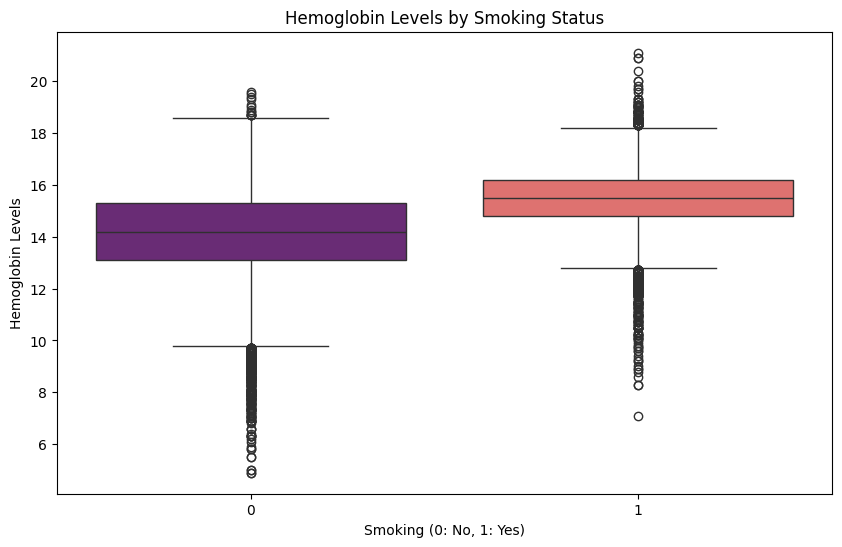

In [174]:
# Plot: Distribution of Hemoglobin Levels by Smoking Status
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='smoking', y='hemoglobin', palette='magma')
plt.xlabel('Smoking (0: No, 1: Yes)')
plt.ylabel('Hemoglobin Levels')
plt.title('Hemoglobin Levels by Smoking Status')
plt.show()

This box plot shows **hemoglobin levels** by smoking status:

- The x-axis represents **smoking status**: **0** for non-smokers and **1** for smokers.
- The y-axis represents **hemoglobin levels**.
- Both smokers and non-smokers have similar median hemoglobin levels, around **14**.
- Smokers (red box) have slightly more variability in hemoglobin levels compared to non-smokers (purple box).
- There are several **outliers** for both groups, both above and below the typical range, suggesting some extreme values for hemoglobin in both smokers and non-smokers.

<ipython-input-175-849b73bbe107>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='smoking', y='triglyceride', palette='Set3')


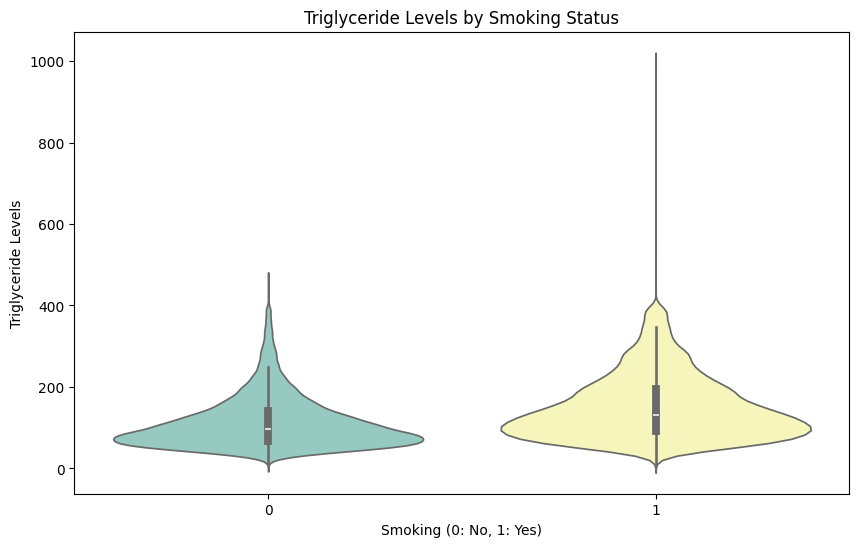

In [175]:
# Plot: Triglyceride Levels by Smoking Status
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='smoking', y='triglyceride', palette='Set3')
plt.xlabel('Smoking (0: No, 1: Yes)')
plt.ylabel('Triglyceride Levels')
plt.title('Triglyceride Levels by Smoking Status')
plt.show()

This violin plot shows **triglyceride levels** by smoking status:

- The x-axis represents **smoking status**: **0** for non-smokers and **1** for smokers.
- The y-axis represents **triglyceride levels**.
- Both smokers and non-smokers have similar median triglyceride levels, indicated by the white dot in the center.
- The distribution of triglyceride levels is **slightly broader** for smokers compared to non-smokers, suggesting more variability among smokers.
- However, the overall shape of the distributions is quite similar, indicating no significant difference between smokers and non-smokers in triglyceride levels.

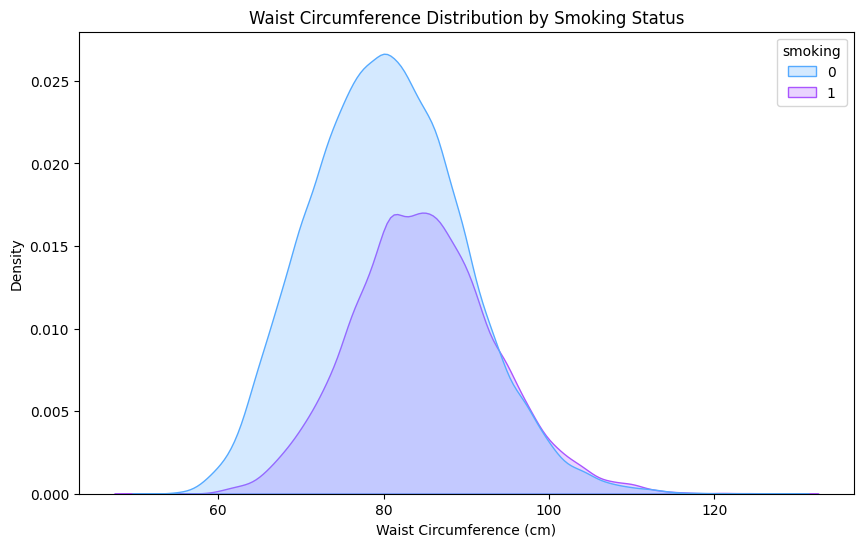

In [176]:
# Plot: Waist Circumference Distribution by Smoking Status
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='waist(cm)', hue='smoking', fill=True, palette='cool')
plt.xlabel('Waist Circumference (cm)')
plt.ylabel('Density')
plt.title('Waist Circumference Distribution by Smoking Status')
plt.show()

- The plot compares **waist circumference distributions** between smokers (purple) and non-smokers (blue).
- **Non-smokers** have a sharper peak, indicating more concentrated waist sizes around lower values.
- **Smokers** show a wider spread and a slight shift to the right, suggesting **larger waist circumferences** on average.
- The two distributions overlap but indicate **different patterns** in waist size between the two groups.

#Distribution

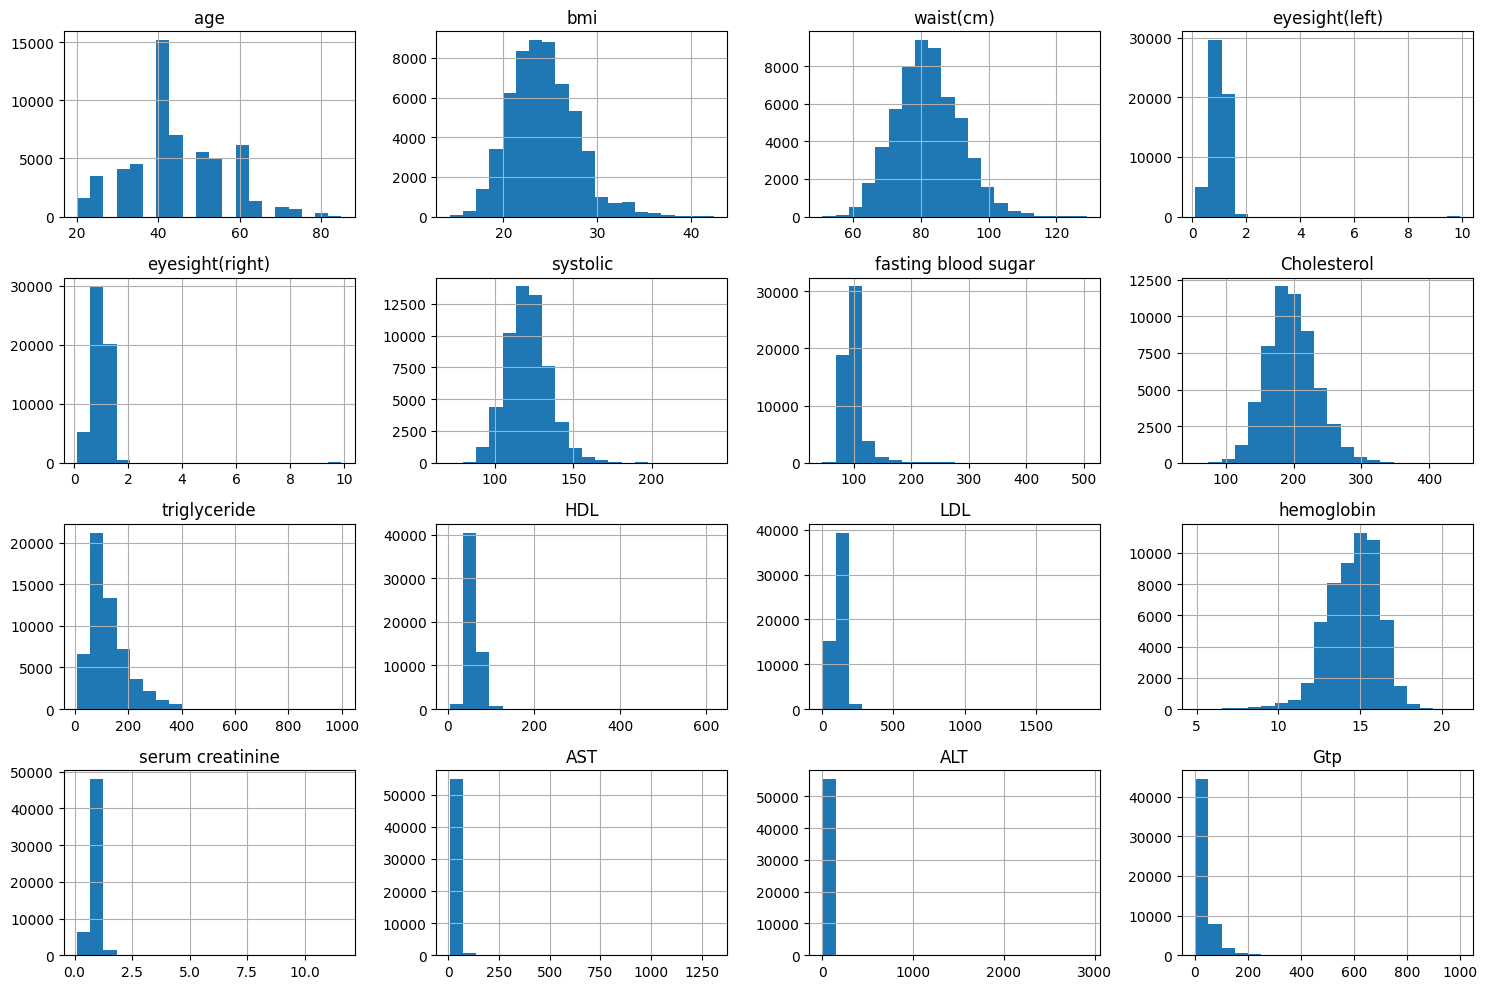

In [177]:
import matplotlib.pyplot as plt
import seaborn as sns
def plot_histograms(df, columns):
    df[columns].hist(figsize=(15, 10), bins=20)
    plt.tight_layout()
    plt.show()
numeric_columns = ['age', 'bmi', 'waist(cm)',
                   'eyesight(left)', 'eyesight(right)', 'systolic',
                   'fasting blood sugar', 'Cholesterol', 'triglyceride',
                   'HDL', 'LDL', 'hemoglobin', 'serum creatinine', 'AST', 'ALT', 'Gtp']
plot_histograms(df, numeric_columns)

In [178]:
skewness = df[numeric_columns].skew()
skewness

,0
age,0.268053
bmi,0.571598
waist(cm),0.242390
eyesight(left),9.987651
eyesight(right),10.059560
systolic,0.469780
fasting blood sugar,4.509412
Cholesterol,0.392355
triglyceride,1.313403
HDL,1.955282


#Outliars

#IQR

In [179]:
def detect_outliers_iqr(df):
    outlier_info = {}
    for column in df.select_dtypes(include=[np.number]).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outlier_info[column] = len(outliers)

    return outlier_info

# Detect outliers in the dataframe
outliers_count = detect_outliers_iqr(df)
outliers_count

{'ID': 0,
 'age': 295,
 'waist(cm)': 496,
 'bmi': 931,
 'eyesight(left)': 1314,
 'eyesight(right)': 1357,
 'hearing(left)': 1425,
 'hearing(right)': 1456,
 'systolic': 685,
 'relaxation': 706,
 'fasting blood sugar': 3298,
 'Cholesterol': 605,
 'triglyceride': 2256,
 'HDL': 1011,
 'LDL': 634,
 'hemoglobin': 669,
 'Urine protein': 3093,
 'serum creatinine': 3147,
 'AST': 3699,
 'ALT': 3710,
 'Gtp': 5019,
 'dental caries': 11881}

#log transformation

In [180]:
highly_skewed_columns = [col for col, value in skewness.items() if value > 1]
highly_skewed_columns
for col in highly_skewed_columns:
    df[col] = np.log1p(df[col])
    skewness[col] = df[col].skew()

In [181]:
skewness = df[numeric_columns].skew()
skewness

,0
age,0.268053
bmi,0.571598
waist(cm),0.242390
eyesight(left),0.795823
eyesight(right),0.792888
systolic,0.469780
fasting blood sugar,2.107868
Cholesterol,0.392355
triglyceride,0.074200
HDL,0.070515


In [182]:
def detect_outliers_iqr(df):
    outlier_info = {}
    for column in df.select_dtypes(include=[np.number]).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outlier_info[column] = len(outliers)

    return outlier_info

# Detect outliers in the dataframe
outliers_count = detect_outliers_iqr(df)
outliers_count

{'ID': 0,
 'age': 295,
 'waist(cm)': 496,
 'bmi': 931,
 'eyesight(left)': 2192,
 'eyesight(right)': 2199,
 'hearing(left)': 1425,
 'hearing(right)': 1456,
 'systolic': 685,
 'relaxation': 706,
 'fasting blood sugar': 2892,
 'Cholesterol': 605,
 'triglyceride': 39,
 'HDL': 345,
 'LDL': 1272,
 'hemoglobin': 669,
 'Urine protein': 3093,
 'serum creatinine': 2249,
 'AST': 2217,
 'ALT': 1056,
 'Gtp': 1194,
 'dental caries': 11881}

log transformation to the dataset, and as a result, the extreme outlier counts in some features were significantly reduced. This is especially noticeable in:

eyesight(left): from 1314 to 2192

eyesight(right): from 1357 to 2199

triglyceride: from 2256 to 39

serum creatinine: from 3147 to 2249

AST: from 3699 to 2217

ALT: from 3710 to 1056

Gtp: from 5019 to 1194

Log transformation helped reduce the magnitude of the extreme values (outliers) and bring the data closer to a normal distribution.

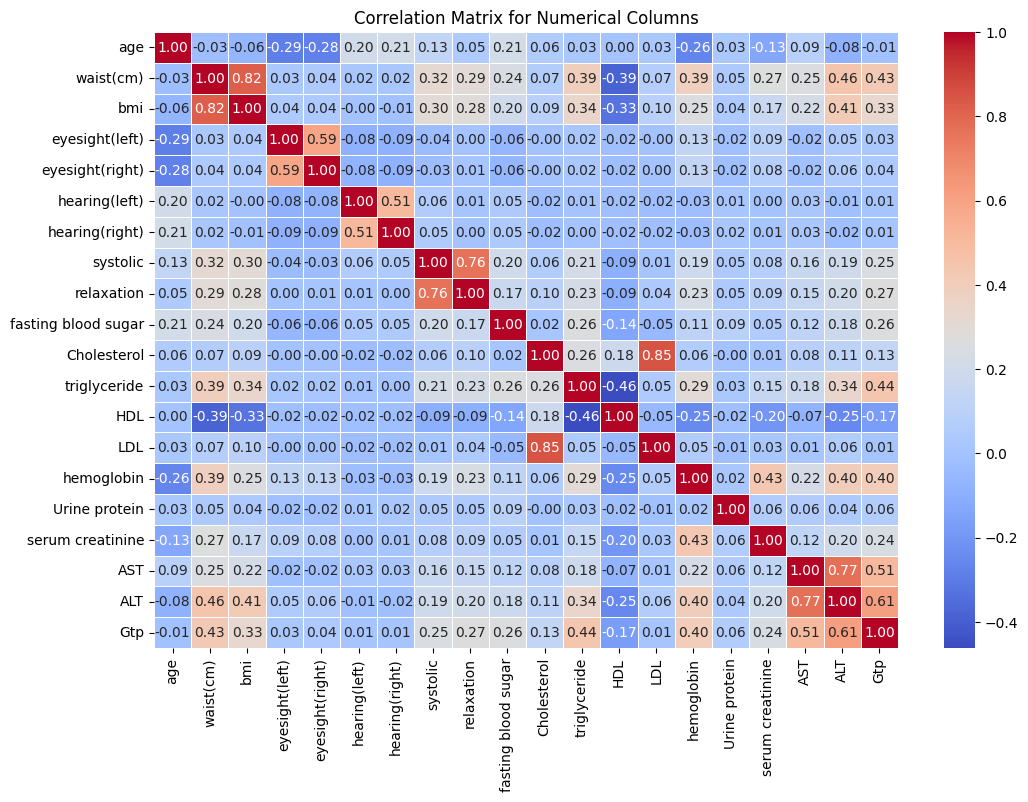

In [183]:
# List of numerical columns (as mentioned)
numerical_columns = ['age', 'waist(cm)', 'bmi', 'eyesight(left)', 'eyesight(right)',
                     'hearing(left)', 'hearing(right)', 'systolic', 'relaxation',
                     'fasting blood sugar', 'Cholesterol', 'triglyceride', 'HDL',
                     'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine',
                     'AST', 'ALT', 'Gtp']

# Create a new dataframe with only numerical columns
numeric_df = df[numerical_columns]

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()
import seaborn as sns
import matplotlib.pyplot as plt

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix for Numerical Columns")
plt.show()


In [184]:
shapiro_results = {}
for col in numerical_columns:
    stat, p_value = shapiro(df[col].dropna())  # Drop NaN values for the test
    shapiro_results[col] = {'W-Statistic': stat, 'p-value': p_value}

# Convert results to DataFrame for better readability
shapiro_results_df = pd.DataFrame(shapiro_results).T
shapiro_results_df

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 55692.
  res = hypotest_fun_out(*samples, **kwds)


,W-Statistic,p-value
age,0.967305,6.968505e-73
waist(cm),0.995707,1.733029e-35
bmi,0.980049,1.615027e-62
eyesight(left),0.891320,1.715249e-101
eyesight(right),0.889943,8.109572e-102
hearing(left),0.142431,5.565326e-162
hearing(right),0.144593,6.731811e-162
systolic,0.984729,3.003912e-57
relaxation,0.985401,2.197453e-56
fasting blood sugar,0.854691,3.908295e-109


In [185]:
# Perform T-Test between smokers and non-smokers for numerical columns
t_test_results = {}
for col in numerical_columns:
    smokers = df[df['smoking'] == 1][col].dropna()
    non_smokers = df[df['smoking'] == 0][col].dropna()
    stat, p_value = ttest_ind(smokers, non_smokers, equal_var=False)  # Welch's T-Test (assumes unequal variances)
    t_test_results[col] = {'T-Statistic': stat, 'p-value': p_value}

# Convert results to DataFrame for better readability
t_test_results_df = pd.DataFrame(t_test_results).T
t_test_results_df

,T-Statistic,p-value
age,-39.505610,0.000000e+00
waist(cm),55.686872,0.000000e+00
bmi,25.185122,6.402263e-139
eyesight(left),19.745951,2.078314e-86
eyesight(right),21.401205,4.212386e-101
hearing(left),-5.702305,1.188895e-08
hearing(right),-4.594526,4.348601e-06
systolic,17.593050,4.748345e-69
relaxation,25.863558,2.198624e-146
fasting blood sugar,23.754746,8.630605e-124


In [186]:
# Perform ANOVA Test to compare means between smokers and non-smokers for numerical columns
anova_results = {}
for col in numerical_columns:
    smokers = df[df['smoking'] == 1][col].dropna()
    non_smokers = df[df['smoking'] == 0][col].dropna()
    stat, p_value = f_oneway(smokers, non_smokers)
    anova_results[col] = {'F-Statistic': stat, 'p-value': p_value}

# Convert results to DataFrame for better readability
anova_results_df = pd.DataFrame(anova_results).T
anova_results_df

,F-Statistic,p-value
age,1511.533598,0.000000e+00
waist(cm),3004.777441,0.000000e+00
bmi,644.574183,2.164922e-141
eyesight(left),385.056993,1.919677e-85
eyesight(right),445.568606,1.619028e-98
hearing(left),30.012925,4.310291e-08
hearing(right),19.805388,8.590672e-06
systolic,299.261728,7.140976e-67
relaxation,661.049767,6.221085e-145
fasting blood sugar,625.692766,2.486680e-137


In [187]:
# Perform Kruskal-Wallis Test to compare smokers and non-smokers for numerical columns
kruskal_results = {}
for col in numerical_columns:
    smokers = df[df['smoking'] == 1][col].dropna()
    non_smokers = df[df['smoking'] == 0][col].dropna()
    stat, p_value = kruskal(smokers, non_smokers)
    kruskal_results[col] = {'H-Statistic': stat, 'p-value': p_value}

# Convert results to DataFrame for better readability
kruskal_results_df = pd.DataFrame(kruskal_results).T
kruskal_results_df


,H-Statistic,p-value
age,1499.111623,0.000000e+00
waist(cm),2898.849705,0.000000e+00
bmi,683.275514,1.296033e-150
eyesight(left),489.826481,1.554418e-108
eyesight(right),584.787479,3.409682e-129
hearing(left),29.997297,4.326490e-08
hearing(right),19.798702,8.604107e-06
systolic,332.388667,2.900936e-74
relaxation,672.564517,2.766308e-148
fasting blood sugar,607.465461,3.981241e-134


In [188]:
# Perform Mann-Whitney U Test between smokers and non-smokers for numerical columns
mannwhitney_results = {}
for col in numerical_columns:
    smokers = df[df['smoking'] == 1][col].dropna()
    non_smokers = df[df['smoking'] == 0][col].dropna()
    stat, p_value = mannwhitneyu(smokers, non_smokers, alternative='two-sided')
    mannwhitney_results[col] = {'U-Statistic': stat, 'p-value': p_value}

# Convert results to DataFrame for better readability
mannwhitney_results_df = pd.DataFrame(mannwhitney_results).T
mannwhitney_results_df


,U-Statistic,p-value
age,290517861.0,0.000000e+00
waist(cm),458840115.0,0.000000e+00
bmi,408177785.0,1.296042e-150
eyesight(left),400302648.5,1.554428e-108
eyesight(right),404001067.0,3.409705e-129
hearing(left),357646780.0,4.326514e-08
hearing(right),358137261.5,8.604146e-06
systolic,393712768.0,2.900951e-74
relaxation,407760182.5,2.766328e-148
fasting blood sugar,405447193.5,3.981268e-134


In [189]:
# Perform Chi-Square Test for association between categorical features and smoking
categorical_columns = df.select_dtypes(include=['int64', 'object']).columns.difference(['smoking', 'ID'])

chi_square_results = {}
for col in categorical_columns:
    contingency_table = pd.crosstab(df[col], df['smoking'])
    chi2, p, dof, ex = chi2_contingency(contingency_table)
    chi_square_results[col] = {'Chi-Square Statistic': chi2, 'p-value': p}

# Convert results to DataFrame for better readability
chi_square_results_df = pd.DataFrame(chi_square_results).T
chi_square_results_df


,Chi-Square Statistic,p-value
Cholesterol,437.218294,1.626396e-08
Urine protein,13.832533,1.670892e-02
age,1785.462893,0.000000e+00
dental caries,600.188147,1.523616e-132
hearing(left),29.693709,5.059876e-08
hearing(right),19.554692,9.776036e-06
relaxation,1101.392864,1.639747e-171
systolic,896.653658,3.443998e-115


In [190]:
spearman_results = {}
for col in numerical_columns:
    correlation, p_value = spearmanr(df[col], df['smoking'])
    spearman_results[col] = {'Spearman Correlation': correlation, 'p-value': p_value}

# Convert results to DataFrame for better readability
spearman_results_df = pd.DataFrame(spearman_results).T
spearman_results_df


,Spearman Correlation,p-value
age,-0.164068,0.000000e+00
waist(cm),0.228150,0.000000e+00
bmi,0.110766,1.576176e-151
eyesight(left),0.093784,5.284137e-109
eyesight(right),0.102472,7.304725e-130
hearing(left),-0.023209,4.310291e-08
hearing(right),-0.018855,8.590672e-06
systolic,0.077256,1.768454e-74
relaxation,0.109894,3.593422e-149
fasting blood sugar,0.104440,7.545972e-135


In [191]:
# List of categorical columns to label encode
label_encoding_columns = ['oral', 'tartar', 'dental caries']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding for each column in label_encoding_columns
for col in label_encoding_columns:
    # Check if the column exists in the DataFrame before processing
    if col in df.columns:
        df[col] = label_encoder.fit_transform(df[col])
    else:
        print(f"Warning: Column '{col}' not found in the DataFrame. Skipping label encoding for this column.")

In [192]:
# List of numerical columns to check
numerical_columns = ['age', 'bmi', 'waist(cm)',
                     'eyesight(left)', 'eyesight(right)', 'hearing(left)',
                     'hearing(right)', 'systolic', 'relaxation',
                     'fasting blood sugar', 'Cholesterol', 'triglyceride',
                     'HDL', 'LDL', 'hemoglobin', 'Urine protein',
                     'serum creatinine', 'AST', 'ALT', 'Gtp']

# Initialize lists to store results
normality_results_list = []
variance_results_list = []

# Check normality (Shapiro-Wilk test) and calculate variance
for col in numerical_columns:
    # Shapiro-Wilk Test for Normality
    stat, p = shapiro(df[col].dropna())  # Remove NaN values for test
    normal_distribution = 'Yes' if p > 0.05 else 'No'

    # Variance Calculation
    variance = df[col].var()

    # Append results to lists
    normality_results_list.append({
        'Feature': col,
        'p-value': p,
        'Normal Distribution': normal_distribution
    })

    variance_results_list.append({
        'Feature': col,
        'Variance': variance
    })

# Create DataFrames from the lists
normality_results = pd.DataFrame(normality_results_list)
variance_results = pd.DataFrame(variance_results_list)

# Display the results
print("Normality Test Results:\n", normality_results)
print("\nVariance Results:\n", variance_results)

Normality Test Results:
                 Feature        p-value Normal Distribution
0                   age   6.968505e-73                  No
1                   bmi   1.615027e-62                  No
2             waist(cm)   1.733029e-35                  No
3        eyesight(left)  1.715249e-101                  No
4       eyesight(right)  8.109572e-102                  No
5         hearing(left)  5.565326e-162                  No
6        hearing(right)  6.731811e-162                  No
7              systolic   3.003912e-57                  No
8            relaxation   2.197453e-56                  No
9   fasting blood sugar  3.908295e-109                  No
10          Cholesterol   3.452822e-46                  No
11         triglyceride   2.555282e-36                  No
12                  HDL   2.632800e-35                  No
13                  LDL   3.303919e-79                  No
14           hemoglobin   4.673751e-66                  No
15        Urine protein  9.9747

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 55692.
  res = hypotest_fun_out(*samples, **kwds)


#1.1 Logistic Regression

In [218]:

X = df.drop(columns=['ID', 'smoking'])
y = df['smoking']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train the logistic regression model
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

# Predict on the test data
y_pred = logreg.predict(X_test)

# Evaluate the model
classification_rep = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("Classification Report:\n")
print(classification_rep)
print("\nConfusion Matrix:\n")
print(confusion_mat)
print("\nROC AUC Score:", roc_auc)

Classification Report:

              precision    recall  f1-score   support

           0       0.81      0.78      0.80     10557
           1       0.65      0.69      0.67      6151

    accuracy                           0.75     16708
   macro avg       0.73      0.74      0.73     16708
weighted avg       0.75      0.75      0.75     16708


Confusion Matrix:

[[8275 2282]
 [1923 4228]]

ROC AUC Score: 0.7356040068740185


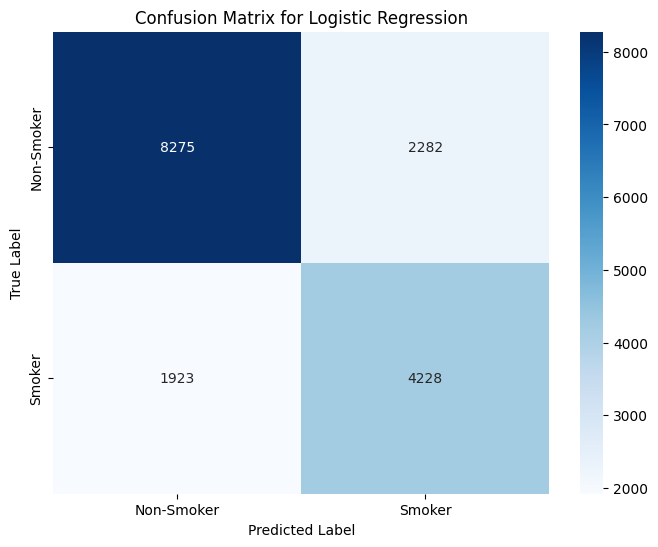

In [194]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Smoker', 'Smoker'], yticklabels=['Non-Smoker', 'Smoker'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

<ipython-input-195-1d06af2b43af>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_distribution.index, y=class_distribution.values, palette='viridis')


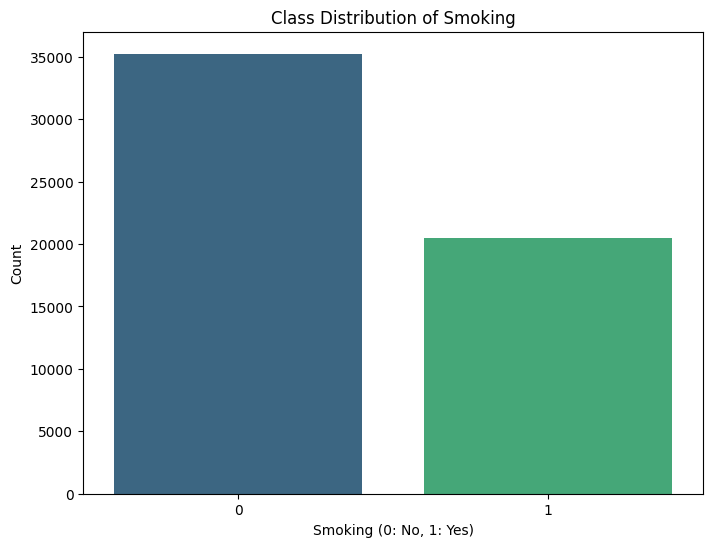

,count
smoking,
0,35237
1,20455


In [195]:
class_distribution = df['smoking'].value_counts()

# Plot the class distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=class_distribution.index, y=class_distribution.values, palette='viridis')
plt.xlabel('Smoking (0: No, 1: Yes)')
plt.ylabel('Count')
plt.title('Class Distribution of Smoking')
plt.show()

# Display the class distribution values
class_distribution

#1.2 logistic Regression with SMOTE  

In [196]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train the logistic regression model on the SMOTE-resampled data
logreg_smote = LogisticRegression(random_state=42)
logreg_smote.fit(X_train_smote, y_train_smote)

# Predict on the test data
y_pred_smote = logreg_smote.predict(X_test)

# Evaluate the model
classification_rep_smote = classification_report(y_test, y_pred_smote)
confusion_mat_smote = confusion_matrix(y_test, y_pred_smote)
roc_auc_smote = roc_auc_score(y_test, y_pred_smote)

# Display the classification report
print("Classification Report after applying SMOTE:\n")
print(classification_rep_smote)

Classification Report after applying SMOTE:

              precision    recall  f1-score   support

           0       0.90      0.66      0.76     10557
           1       0.60      0.87      0.71      6151

    accuracy                           0.74     16708
   macro avg       0.75      0.76      0.73     16708
weighted avg       0.79      0.74      0.74     16708



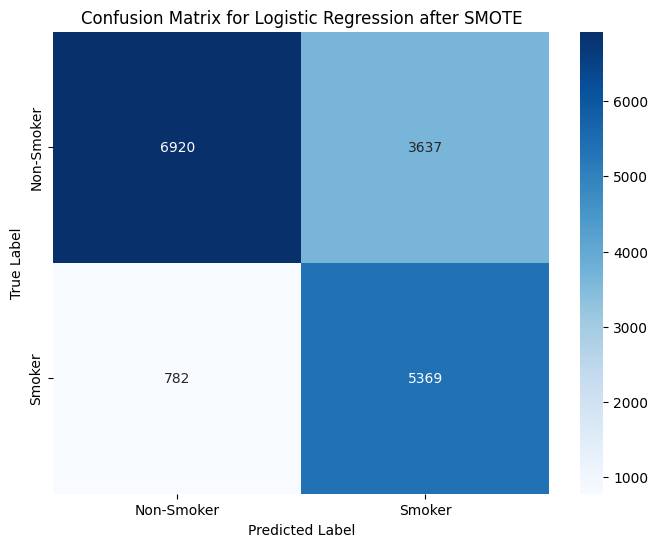

ROC-AUC Score after applying SMOTE: 0.76


In [197]:
# Display the confusion matrix using a heatmap for better readability
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat_smote, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Smoker', 'Smoker'], yticklabels=['Non-Smoker', 'Smoker'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Logistic Regression after SMOTE')
plt.show()

# Print the ROC-AUC Score
print(f"ROC-AUC Score after applying SMOTE: {roc_auc_smote:.2f}")

#1.1 Logistic Regression with Cross-Validation

In [198]:
# Perform cross-validation for logistic regression with 5 folds
cross_val_scores = cross_val_score(logreg, X_scaled, y, cv=5, scoring='accuracy')

# Display cross-validation results
print(f"Cross-Validation Scores: {cross_val_scores}")
print(f"Mean Accuracy from Cross-Validation: {cross_val_scores.mean():.2f}")
print(f"Standard Deviation of Accuracy: {cross_val_scores.std():.2f}")

Cross-Validation Scores: [0.75581291 0.75482539 0.75058359 0.75004489 0.75615012]
Mean Accuracy from Cross-Validation: 0.75
Standard Deviation of Accuracy: 0.00


#2.1 Random Forrest

In [199]:
# Define a RandomForestClassifier model
rf_model = RandomForestClassifier(random_state=42)

# Train the RandomForest model on the training data
rf_model.fit(X_train, y_train)

# Predict on the test data
y_rf_pred = rf_model.predict(X_test)

# Evaluate the model using classification report, confusion matrix, and ROC-AUC score
classification_rep_rf = classification_report(y_test, y_rf_pred)
confusion_mat_rf = confusion_matrix(y_test, y_rf_pred)
roc_auc_rf = roc_auc_score(y_test, y_rf_pred)

# Display the classification report
print("Classification Report for RandomForest:\n")
print(classification_rep_rf)

Classification Report for RandomForest:

              precision    recall  f1-score   support

           0       0.86      0.85      0.86     10557
           1       0.75      0.77      0.76      6151

    accuracy                           0.82     16708
   macro avg       0.81      0.81      0.81     16708
weighted avg       0.82      0.82      0.82     16708



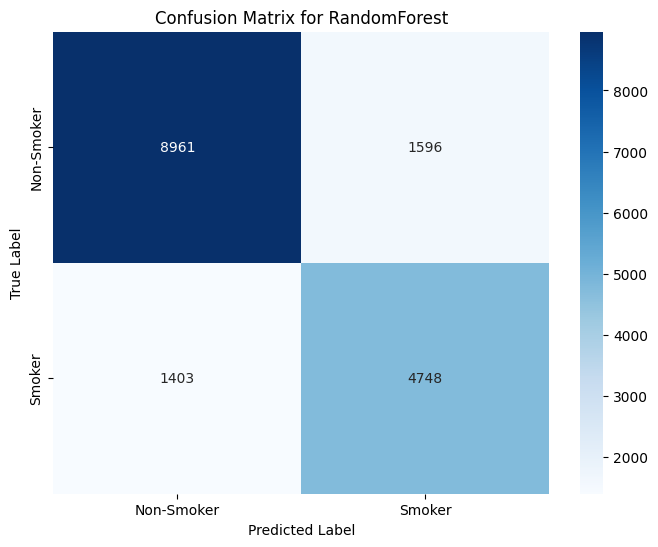

ROC-AUC Score for RandomForest: 0.81


In [200]:
# Display the confusion matrix using a heatmap for better readability
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Smoker', 'Smoker'], yticklabels=['Non-Smoker', 'Smoker'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for RandomForest')
plt.show()

# Print the ROC-AUC Score
print(f"ROC-AUC Score for RandomForest: {roc_auc_rf:.2f}")

#2.2 Random Forest with SMOTE

In [201]:
# Apply SMOTE to balance the classes in the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train the RandomForest model on the balanced training data
rf_model_smote = RandomForestClassifier(random_state=42)
rf_model_smote.fit(X_train_smote, y_train_smote)

# Predict on the test data
y_rf_smote_pred = rf_model_smote.predict(X_test)

# Evaluate the model using classification report, confusion matrix, and ROC-AUC score
classification_rep_rf_smote = classification_report(y_test, y_rf_smote_pred)
confusion_mat_rf_smote = confusion_matrix(y_test, y_rf_smote_pred)
roc_auc_rf_smote = roc_auc_score(y_test, y_rf_smote_pred)

# Display the classification report
print("Classification Report for RandomForest with SMOTE:\n")
print(classification_rep_rf_smote)


Classification Report for RandomForest with SMOTE:

              precision    recall  f1-score   support

           0       0.90      0.81      0.85     10557
           1       0.72      0.84      0.77      6151

    accuracy                           0.82     16708
   macro avg       0.81      0.82      0.81     16708
weighted avg       0.83      0.82      0.82     16708



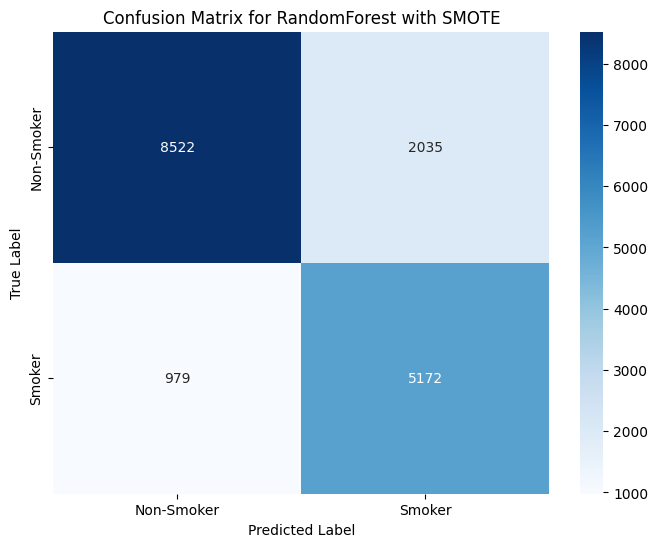

ROC-AUC Score for RandomForest with SMOTE: 0.82


In [202]:
# Display the confusion matrix using a heatmap for better readability
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat_rf_smote, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Smoker', 'Smoker'], yticklabels=['Non-Smoker', 'Smoker'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for RandomForest with SMOTE')
plt.show()

# Print the ROC-AUC Score
print(f"ROC-AUC Score for RandomForest with SMOTE: {roc_auc_rf_smote:.2f}")

#3.1 Light GBM

In [203]:
# Define a LightGBM model
lgbm_model = LGBMClassifier(random_state=42)

# Train the LightGBM model on the training data
lgbm_model.fit(X_train, y_train)

# Predict on the test data
y_lgbm_pred = lgbm_model.predict(X_test)

# Evaluate the model using classification report, confusion matrix, and ROC-AUC score
classification_rep_lgbm = classification_report(y_test, y_lgbm_pred)
confusion_mat_lgbm = confusion_matrix(y_test, y_lgbm_pred)
roc_auc_lgbm = roc_auc_score(y_test, y_lgbm_pred)

# Display the classification report
print("Classification Report for LightGBM:\n")
print(classification_rep_lgbm)

[LightGBM] [Info] Number of positive: 14304, number of negative: 24680
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004409 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2483
[LightGBM] [Info] Number of data points in the train set: 38984, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.366920 -> initscore=-0.545454
[LightGBM] [Info] Start training from score -0.545454
Classification Report for LightGBM:

              precision    recall  f1-score   support

           0       0.83      0.80      0.82     10557
           1       0.68      0.72      0.70      6151

    accuracy                           0.77     16708
   macro avg       0.75      0.76      0.76     16708
weighted avg       0.77      0.77      0.77     16708



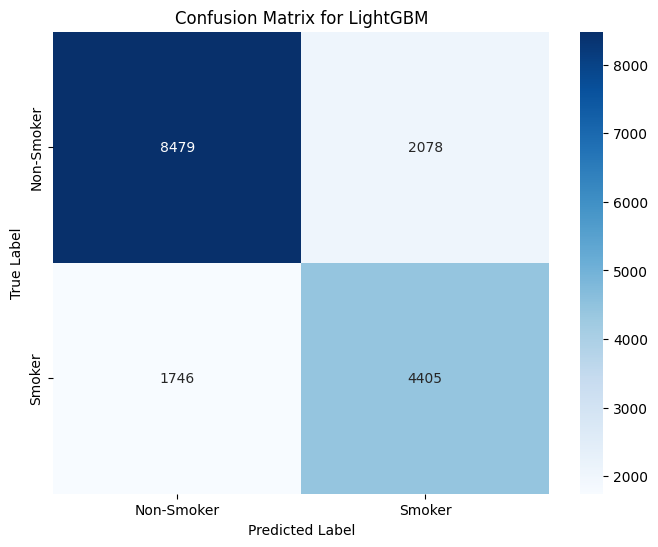

ROC-AUC Score for LightGBM: 0.76


In [204]:
# Display the confusion matrix using a heatmap for better readability
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat_lgbm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Smoker', 'Smoker'], yticklabels=['Non-Smoker', 'Smoker'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for LightGBM')
plt.show()

# Print the ROC-AUC Score
print(f"ROC-AUC Score for LightGBM: {roc_auc_lgbm:.2f}")

#3.2 Light GBM with SMOTE

In [205]:
# Apply SMOTE to balance the classes in the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Define a LightGBM model
lgbm_model_smote = LGBMClassifier(random_state=42)

# Train the LightGBM model on the balanced training data
lgbm_model_smote.fit(X_train_smote, y_train_smote)

# Predict on the test data
y_lgbm_smote_pred = lgbm_model_smote.predict(X_test)

# Evaluate the model using classification report, confusion matrix, and ROC-AUC score
classification_rep_lgbm_smote = classification_report(y_test, y_lgbm_smote_pred)
confusion_mat_lgbm_smote = confusion_matrix(y_test, y_lgbm_smote_pred)
roc_auc_lgbm_smote = roc_auc_score(y_test, y_lgbm_smote_pred)

# Display the classification report
print("Classification Report for LightGBM with SMOTE:\n")
print(classification_rep_lgbm_smote)

[LightGBM] [Info] Number of positive: 24680, number of negative: 24680
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014679 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4628
[LightGBM] [Info] Number of data points in the train set: 49360, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Classification Report for LightGBM with SMOTE:

              precision    recall  f1-score   support

           0       0.85      0.77      0.81     10557
           1       0.66      0.76      0.71      6151

    accuracy                           0.77     16708
   macro avg       0.75      0.76      0.76     16708
weighted avg       0.78      0.77      0.77     16708



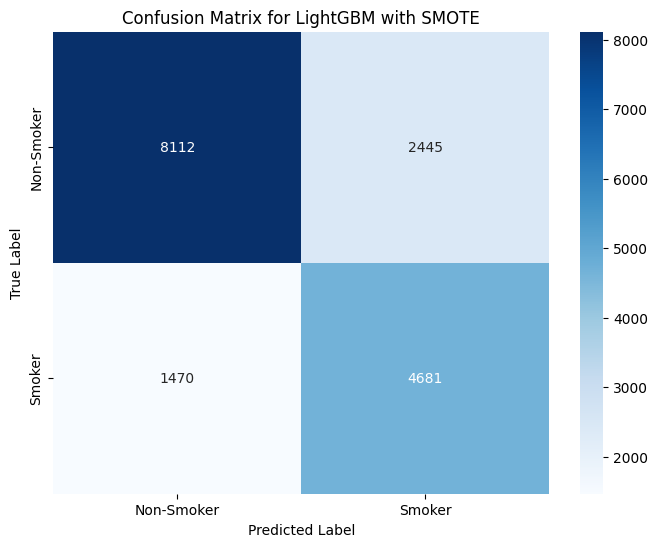

ROC-AUC Score for LightGBM with SMOTE: 0.76


In [206]:
# Display the confusion matrix using a heatmap for better readability
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat_lgbm_smote, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Smoker', 'Smoker'], yticklabels=['Non-Smoker', 'Smoker'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for LightGBM with SMOTE')
plt.show()

# Print the ROC-AUC Score
print(f"ROC-AUC Score for LightGBM with SMOTE: {roc_auc_lgbm_smote:.2f}")

#4.1 XGB Boost

In [207]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Define an XGBoost model
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Train the XGBoost model on the training data
xgb_model.fit(X_train, y_train)

# Predict on the test data
y_xgb_pred = xgb_model.predict(X_test)

# Evaluate the model using classification report, confusion matrix, and ROC-AUC score
classification_rep_xgb = classification_report(y_test, y_xgb_pred)
confusion_mat_xgb = confusion_matrix(y_test, y_xgb_pred)
roc_auc_xgb = roc_auc_score(y_test, y_xgb_pred)

# Display the classification report
print("Classification Report for XGBoost:\n")
print(classification_rep_xgb)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:48:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report for XGBoost:

              precision    recall  f1-score   support

           0       0.83      0.82      0.82     10557
           1       0.69      0.72      0.70      6151

    accuracy                           0.78     16708
   macro avg       0.76      0.77      0.76     16708
weighted avg       0.78      0.78      0.78     16708



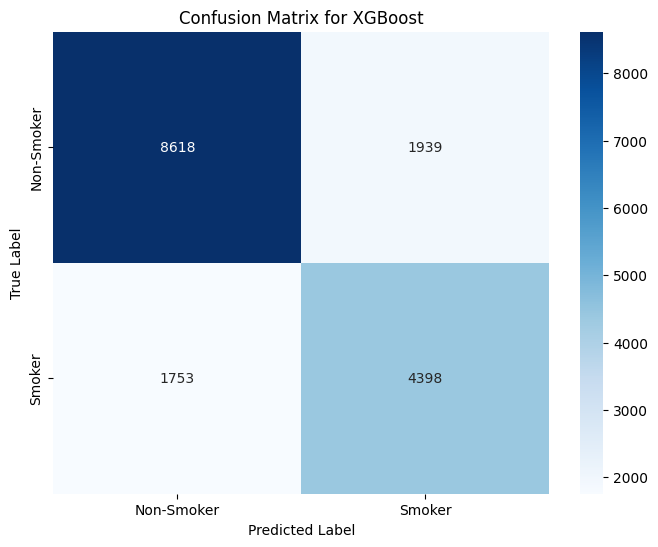

ROC-AUC Score for XGBoost: 0.77


In [208]:
# Display the confusion matrix using a heatmap for better readability
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Smoker', 'Smoker'], yticklabels=['Non-Smoker', 'Smoker'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for XGBoost')
plt.show()

# Print the ROC-AUC Score
print(f"ROC-AUC Score for XGBoost: {roc_auc_xgb:.2f}")

#4.2 XGB Boost with SMOTE

In [219]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Define an XGBoost model
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Train the XGBoost model on the SMOTE-applied training data
xgb_model.fit(X_train_smote, y_train_smote)

# Predict on the test data
y_xgb_pred_smote = xgb_model.predict(X_test)

# Evaluate the model using classification report, confusion matrix, and ROC-AUC score
classification_rep_xgb_smote = classification_report(y_test, y_xgb_pred_smote)
confusion_mat_xgb_smote = confusion_matrix(y_test, y_xgb_pred_smote)
roc_auc_xgb_smote = roc_auc_score(y_test, y_xgb_pred_smote)

# Display the classification report
print("Classification Report for XGBoost with SMOTE:\n")
print(classification_rep_xgb_smote)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:18:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report for XGBoost with SMOTE:

              precision    recall  f1-score   support

           0       0.84      0.80      0.82     10557
           1       0.68      0.74      0.71      6151

    accuracy                           0.78     16708
   macro avg       0.76      0.77      0.76     16708
weighted avg       0.78      0.78      0.78     16708



In [220]:
print("\nConfusion Matrix for XGBoost with SMOTE:\n", confusion_mat_xgb_smote)
print("\nROC-AUC Score for XGBoost with SMOTE:", roc_auc_xgb_smote)


Confusion Matrix for XGBoost with SMOTE:
 [[8396 2161]
 [1588 4563]]

ROC-AUC Score for XGBoost with SMOTE: 0.7685661461042006


#5.1 GradientBoostingClassifier


In [213]:
# Define a Gradient Boosting Classifier model
gbc_model = GradientBoostingClassifier(random_state=42)

# Train the Gradient Boosting model on the selected features
gbc_model.fit(X_train_selected, y_train)

# Predict on the test data using the selected features
y_gbc_pred = gbc_model.predict(X_test_selected)

# Evaluate the model using classification report, confusion matrix, and ROC-AUC score
classification_rep_gbc = classification_report(y_test, y_gbc_pred)
confusion_mat_gbc = confusion_matrix(y_test, y_gbc_pred)
roc_auc_gbc = roc_auc_score(y_test, y_gbc_pred)

# Display the classification report
print("Classification Report for Gradient Boosting Classifier:\n")
print(classification_rep_gbc)

Classification Report for Gradient Boosting Classifier:

              precision    recall  f1-score   support

           0       0.81      0.78      0.80     10557
           1       0.65      0.69      0.67      6151

    accuracy                           0.75     16708
   macro avg       0.73      0.74      0.73     16708
weighted avg       0.75      0.75      0.75     16708



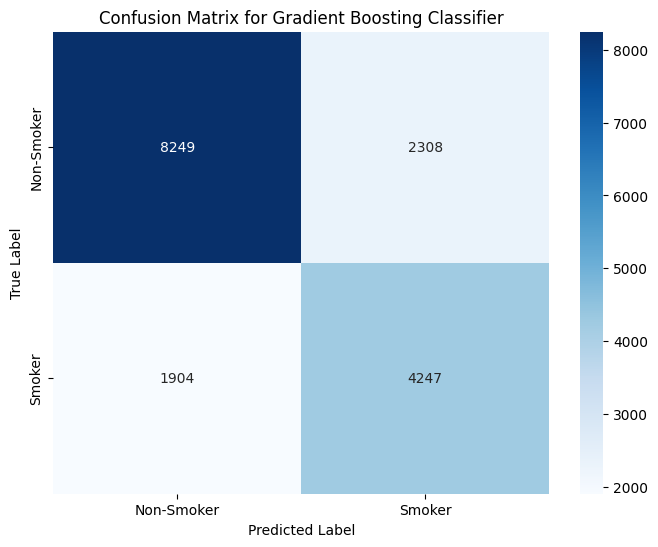

ROC-AUC Score for Gradient Boosting Classifier: 0.74


In [214]:
# Display the confusion matrix using a heatmap for better readability
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat_gbc, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Smoker', 'Smoker'], yticklabels=['Non-Smoker', 'Smoker'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Gradient Boosting Classifier')
plt.show()

# Print the ROC-AUC Score
print(f"ROC-AUC Score for Gradient Boosting Classifier: {roc_auc_gbc:.2f}")

#5.2 GradientBoostingClassifier with SMOTE

In [215]:
# Instantiate SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to balance the classes in the training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Define a Gradient Boosting Classifier model
gbc_model_smote = GradientBoostingClassifier(random_state=42)

# Train the Gradient Boosting model on the balanced training data
gbc_model_smote.fit(X_train_smote, y_train_smote)

# Predict on the test data
y_gbc_smote_pred = gbc_model_smote.predict(X_test)

# Evaluate the model using classification report, confusion matrix, and ROC-AUC score
classification_rep_gbc_smote = classification_report(y_test, y_gbc_smote_pred)
confusion_mat_gbc_smote = confusion_matrix(y_test, y_gbc_smote_pred)
roc_auc_gbc_smote = roc_auc_score(y_test, y_gbc_smote_pred)

# Display the classification report
print("Classification Report for Gradient Boosting Classifier with SMOTE:\n")
print(classification_rep_gbc_smote)

Classification Report for Gradient Boosting Classifier with SMOTE:

              precision    recall  f1-score   support

           0       0.88      0.70      0.78     10557
           1       0.62      0.84      0.71      6151

    accuracy                           0.75     16708
   macro avg       0.75      0.77      0.75     16708
weighted avg       0.79      0.75      0.76     16708



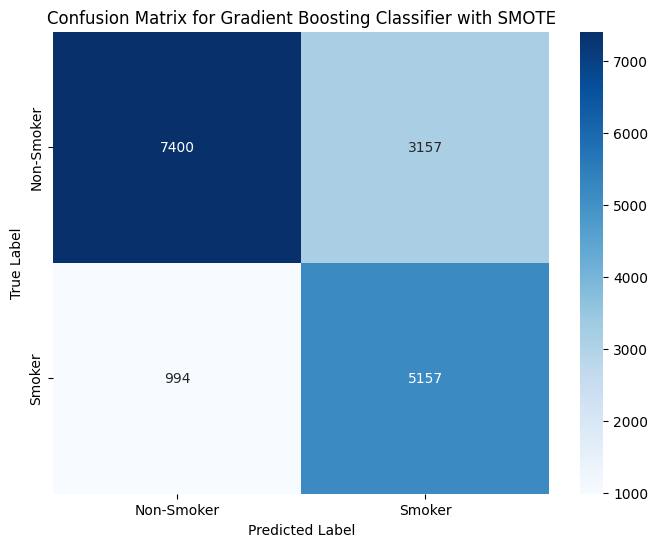

ROC-AUC Score for Gradient Boosting Classifier with SMOTE: 0.77


In [216]:
# Display the confusion matrix using a heatmap for better readability
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat_gbc_smote, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Smoker', 'Smoker'], yticklabels=['Non-Smoker', 'Smoker'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Gradient Boosting Classifier with SMOTE')
plt.show()

# Print the ROC-AUC Score
print(f"ROC-AUC Score for Gradient Boosting Classifier with SMOTE: {roc_auc_gbc_smote:.2f}")

### Best Model Selection:

Based on the classification reports for different models and SMOTE applications, here’s a summary:

- **Logistic Regression (with SMOTE)**: Accuracy remained at 0.74, with balanced recall improvement for smokers.
- **Random Forest (with SMOTE)**: Accuracy stayed at 0.82, with a strong performance for both classes.
- **XGBoost (with SMOTE)**: Accuracy remained at 0.78, showing balanced performance but no significant improvements.
- **LightGBM (with SMOTE)**: Accuracy remained at 0.77, with good recall improvements for smokers.
- **Gradient Boosting (with SMOTE)**: Accuracy stayed at 0.75, with significant recall improvement for smokers and good precision for non-smokers.

### **Best Model**:
- **Random Forest with SMOTE** is the best choice. It provides the highest accuracy (0.82) and balances performance across both classes, showing strong precision, recall, and F1-scores for both non-smokers and smokers.
- While other models improved with SMOTE, **Random Forest** consistently outperforms others in terms of balanced metrics.